In [1]:
## Creating Tensors in PyTorch 
import torch 
import numpy as np 
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [6]:
t_ones = torch.ones([ 2, 3])

In [7]:
t_ones.shape

torch.Size([2, 3])

In [8]:
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
# random tensor 
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.8153, 0.2372, 0.0864],
        [0.1194, 0.5288, 0.9080]])


In [10]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [11]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, '---> ', t_tr.shape)


torch.Size([3, 5]) --->  torch.Size([5, 3])


In [12]:
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [13]:
t_reshape

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [14]:
## Applying mathematical operation to tensors 
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1 
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [15]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [16]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [17]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [18]:
## Computtiing t1_transpose x t_2 is performed by transposing t1, resulting in an array of size 2 x 2:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

In [19]:
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [20]:
## L2 norm 
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [22]:
# Concat operation 
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [23]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)

In [24]:
S

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

In [26]:
S = torch.stack([A, B], axis=0)
S

tensor([[1., 1., 1.],
        [0., 0., 0.]])

## Building input pipelines in PyTorch "

### Creating a PyTorch DataLoader

In [28]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [29]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [32]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset 
---

In [33]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [34]:
from torch.utils.data import Dataset 

In [35]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x 
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [36]:
from torch.utils.data import TensorDataset 
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


In [37]:
joint_dataset = TensorDataset(t_x, t_y)

### Shuffle, batch and repeat
---

In [38]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])


In [39]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x: ', batch[0], '\n y: ', batch[1])

epoch 1
batch 1: x:  tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y:  tensor([0, 2])
batch 2: x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y:  tensor([1, 3])
epoch 2
batch 1: x:  tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y:  tensor([3, 2])
batch 2: x:  tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y:  tensor([0, 1])


### Fetching available datasets from the torchvision.datasets libray

In [55]:
import torchvision 
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True
)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

### Building a linear regression model 

In [42]:
import matplotlib.pyplot as plt

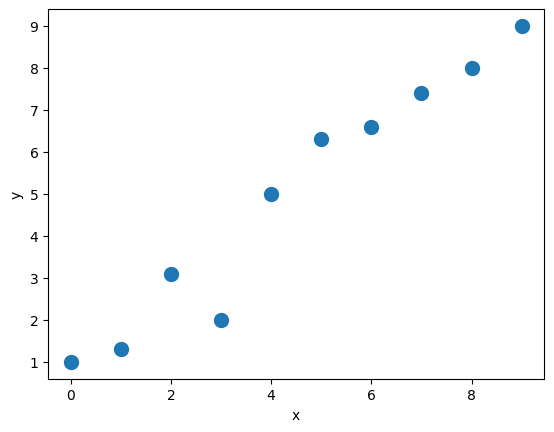

In [43]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [44]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [45]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias 

def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [47]:
learning_rate = 0.001 
num_epochs = 200 
log_epochs = 10 
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 25.2623
Epoch 10 Loss 8.5186
Epoch 20 Loss 16.5465
Epoch 30 Loss 8.9711
Epoch 40 Loss 9.2337
Epoch 50 Loss 2.5487
Epoch 60 Loss 4.8587
Epoch 70 Loss 1.9504
Epoch 80 Loss 0.8391
Epoch 90 Loss 1.8483
Epoch 100 Loss 1.5197
Epoch 110 Loss 0.3250
Epoch 120 Loss 1.0912
Epoch 130 Loss 0.1036
Epoch 140 Loss 0.2429
Epoch 150 Loss 0.1806
Epoch 160 Loss 1.5830
Epoch 170 Loss 0.2031
Epoch 180 Loss 0.3724
Epoch 190 Loss 0.7052


In [48]:
print('Final Parameters:', weight.item(), bias.item())

Final Parameters: 2.6467132568359375 4.718988418579102


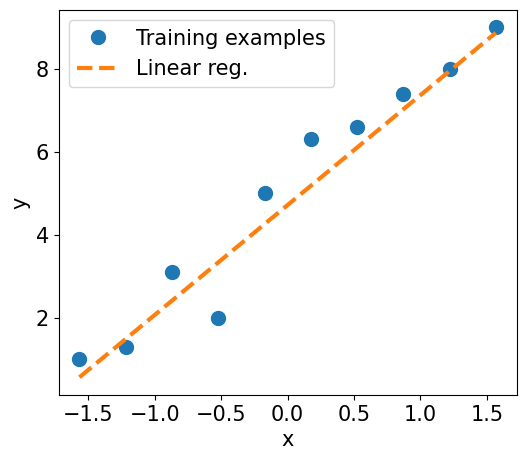

In [49]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Model training via the torch.nn and torch.optim modules

In [50]:
import torch.nn as nn 

In [52]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1 
output_size = 1 
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [53]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 25.1880
Epoch 10 Loss 0.5505
Epoch 20 Loss 58.7983
Epoch 30 Loss 4.7087
Epoch 40 Loss 47.5146
Epoch 50 Loss 15.8618
Epoch 60 Loss 7.5311
Epoch 70 Loss 58.6290
Epoch 80 Loss 1.7021
Epoch 90 Loss 4.1765
Epoch 100 Loss 1.9473
Epoch 110 Loss 46.2856
Epoch 120 Loss 12.1528
Epoch 130 Loss 41.2241
Epoch 140 Loss 10.7424
Epoch 150 Loss 3.5979
Epoch 160 Loss 42.5866
Epoch 170 Loss 4.2811
Epoch 180 Loss 0.7290
Epoch 190 Loss 27.1384


In [54]:
print('Final Parameters: ', model.weight.item(), model.bias.item())

Final Parameters:  3.1583633422851562 5.572874069213867


## Choosing Activation Functions for Multilayer Neural Networks

In [56]:
## Logistic Function 
import numpy as np 
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

In [60]:
def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1 / (1 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

In [61]:
print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [64]:
W = np.array([[1.1, 1.2, 0.8, 0.4], 
             [0.2, 0.4, 1.0, 0.2],
             [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

Net Input: 
 [1.78 0.76 1.65]


In [65]:
print('Output Units: \n', y_probas)

Output Units: 
 [0.856 0.681 0.839]
